# Teste com sensor parado no LIOc

In [214]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as pl
import espec

In [162]:
pathname = os.environ['HOME'] + '/Dropbox/boinha/data/Testes/USB/'
filename0 = '_dev_ttyUSB0_2017-02-09_19_37_35.086_.txt'
filename1 = '_dev_ttyUSB1_2017-02-09_19_37_37.019_.txt'

dd0 = pd.read_table(pathname + filename0, sep=',')
dd1 = pd.read_table(pathname + filename1, sep=',')

#retira os valores com erro
dd0 = dd0.ix[pl.find(dd0.ix[:,3].isnull() == False),:]
dd1 = dd1.ix[pl.find(dd1.ix[:,3].isnull() == False),:]

#data como datetime
dd0.index = pd.to_datetime(dd0.index, format='%Y-%m-%d_%H:%M:%S.%f')
dd1.index = pd.to_datetime(dd1.index, format='%Y-%m-%d_%H:%M:%S.%f')

#escolhe o mesmo periodo de amostragem
ini = '2017-02-09 19:37:40'
fim = '2017-02-09 19:57:35'

dd0 = dd0[ini:fim]
dd1 = dd1[ini:fim]

#nome do index como data
dd0.index.name = 'date'
dd1.index.name = 'date'

dd0['PacketCounter'] = dd0['PacketCounter'].astype(int)
dd1['PacketCounter'] = dd1['PacketCounter'].astype(int)

print dd0.columns
print dd1.columns

Index([u'PacketCounter', u' SampleTimeFine', u' EulerRoll', u' EulerPitch',
       u' EulerYaw', u' AccelerationX', u' AccelerationY', u' AccelerationZ',
       u' magnecticFieldX', u' magnecticFieldY', u' magnecticFieldZ'],
      dtype='object')
Index([u'PacketCounter', u' SampleTimeFine', u' EulerRoll', u' EulerPitch',
       u' EulerYaw', u' AccelerationX', u' AccelerationY', u' AccelerationZ',
       u' magnecticFieldX', u' magnecticFieldY', u' magnecticFieldZ'],
      dtype='object')


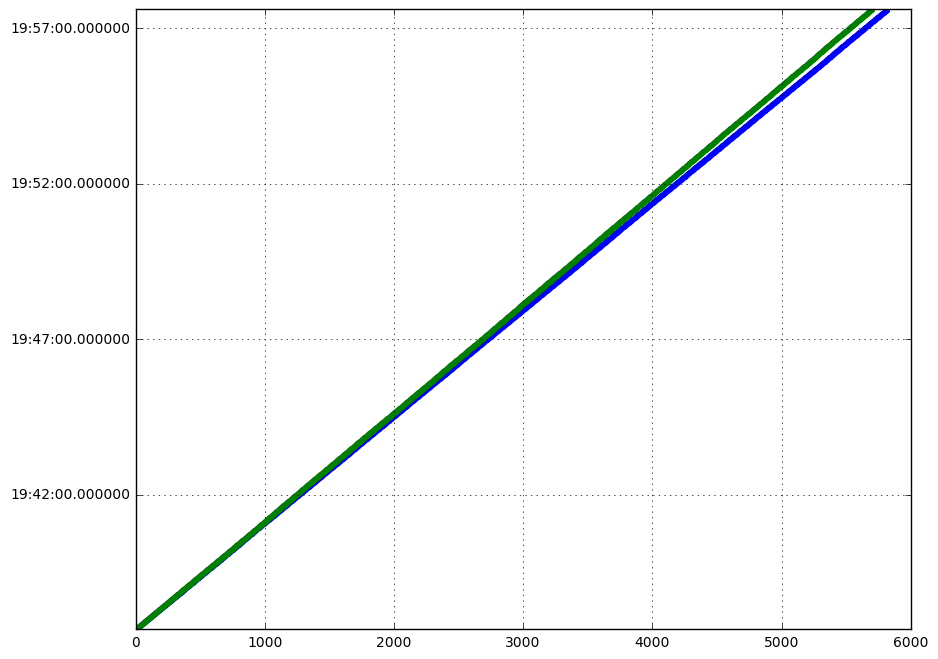

In [187]:
# %matplotlib inline
pl.figure(figsize=(10,8))
pl.plot(dd0.index,'.')
pl.plot(dd1.index,'.')
# pl.xlim(5000,len(dd0))
pl.grid()
pl.show()

In [202]:
print (dd0.index[0], dd1.index[0])
print (dd0.index[-1], dd1.index[-1])

(Timestamp('2017-02-09 19:37:40.160000'), Timestamp('2017-02-09 19:37:40.084000'))
(Timestamp('2017-02-09 19:57:35.961000'), Timestamp('2017-02-09 19:57:35.838000'))


PacketCounter
 SampleTimeFine
 EulerRoll
 EulerPitch
 EulerYaw
 AccelerationX
 AccelerationY
 AccelerationZ
 magnecticFieldX
 magnecticFieldY
 magnecticFieldZ


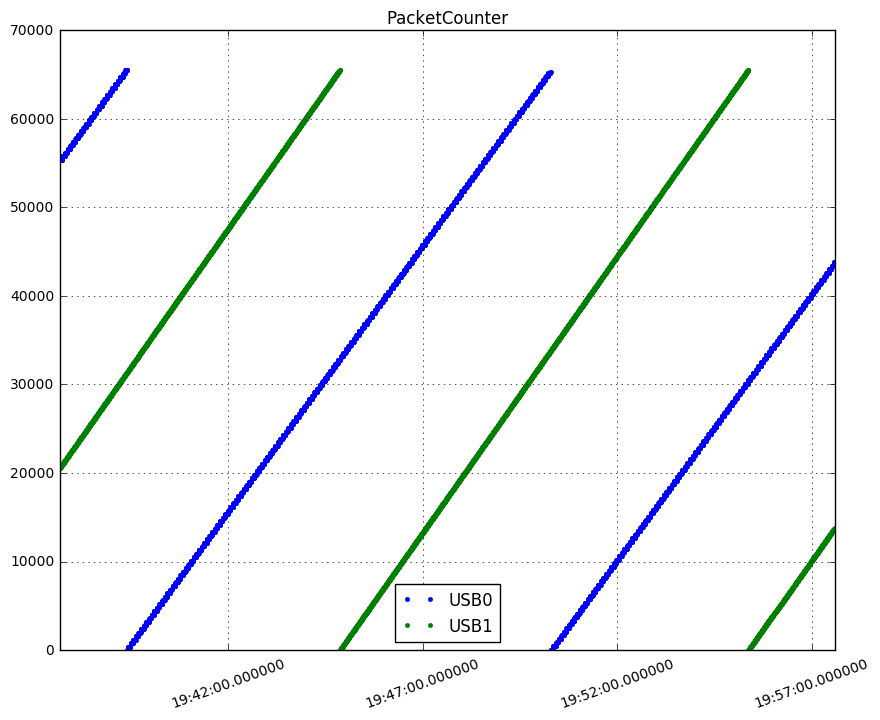

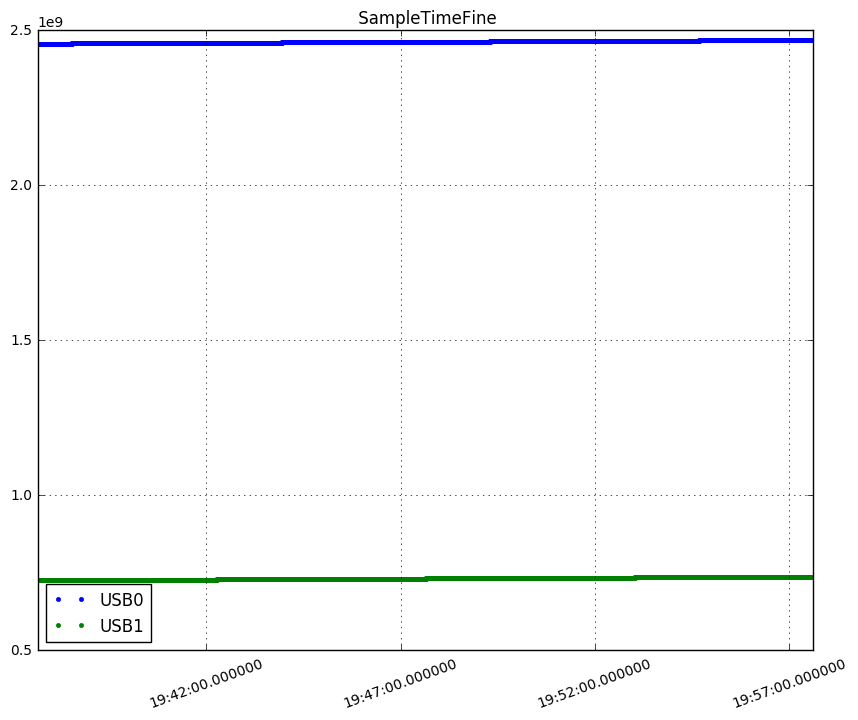

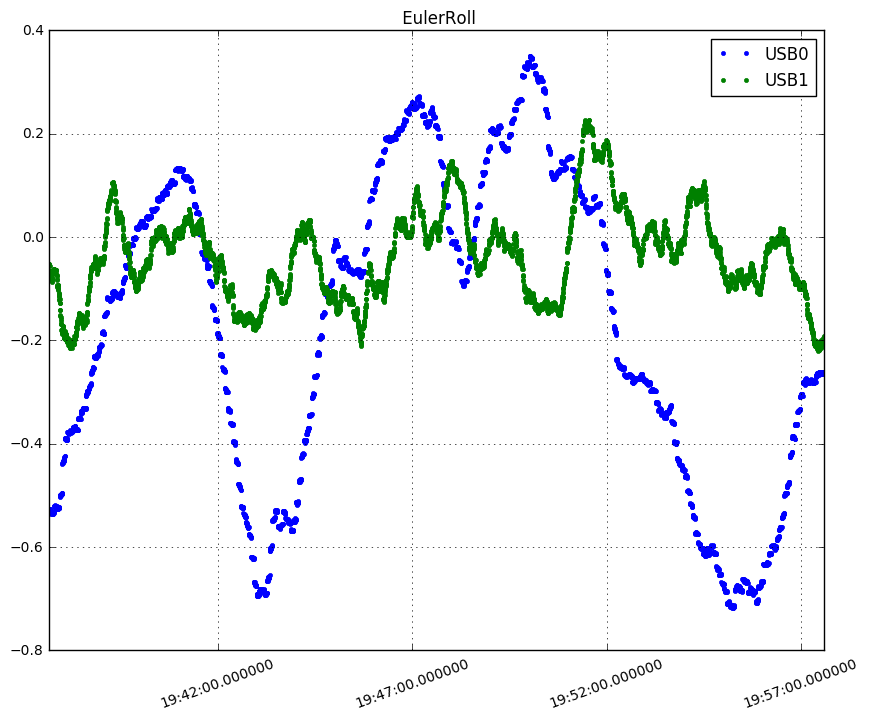

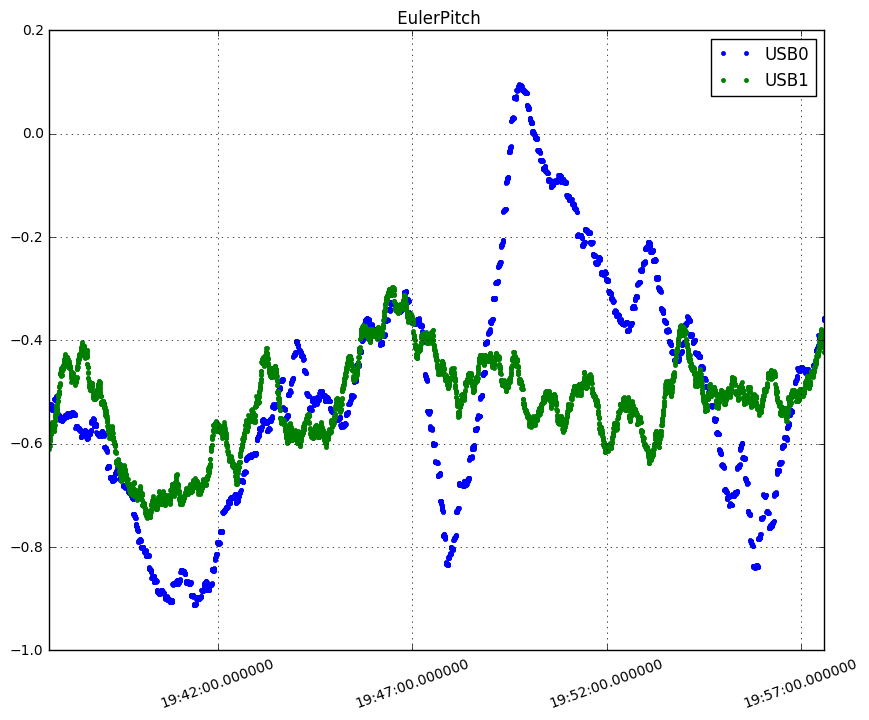

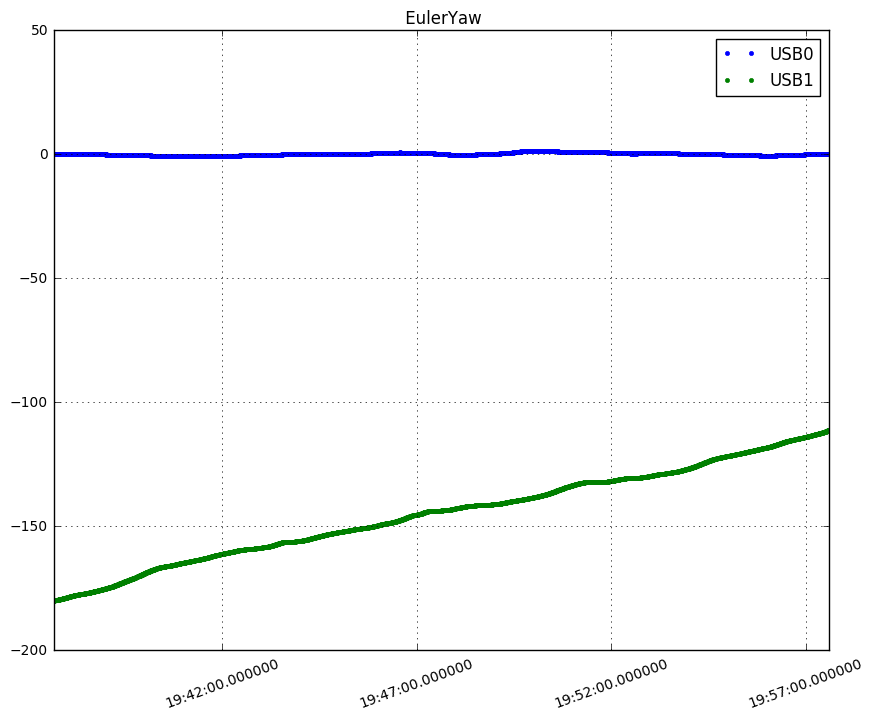

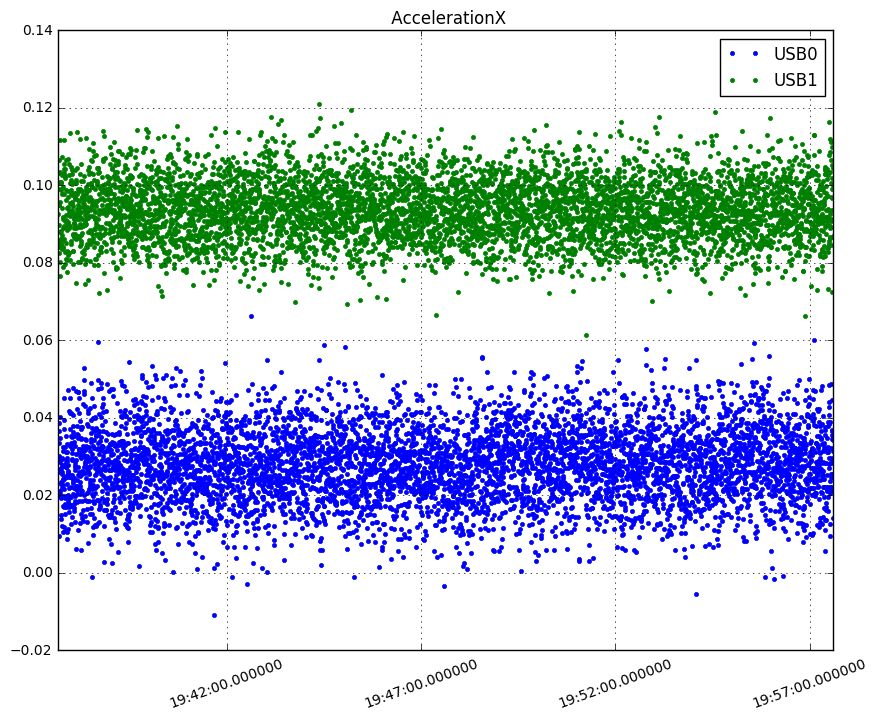

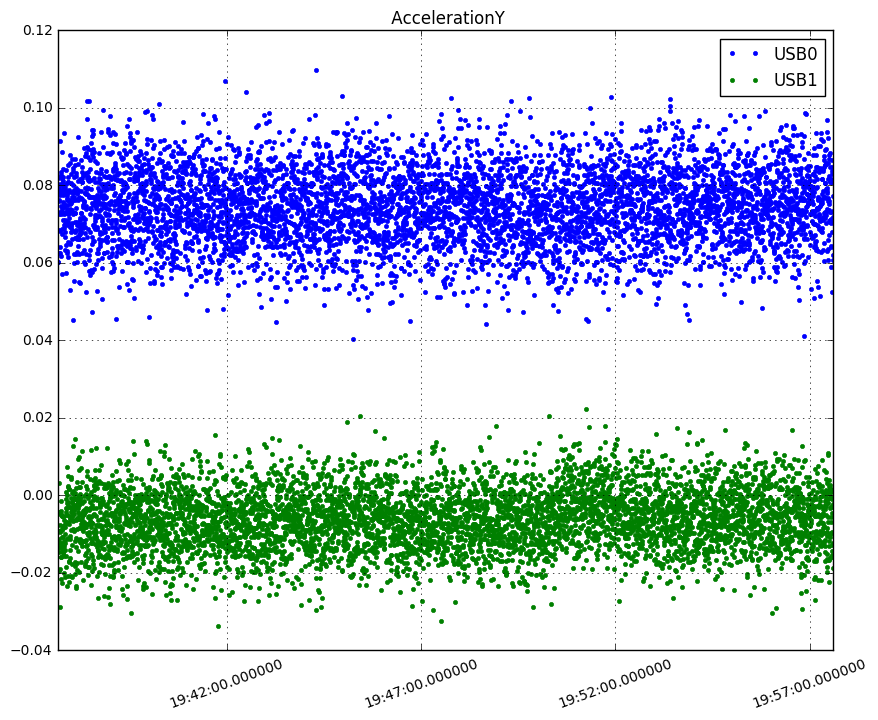

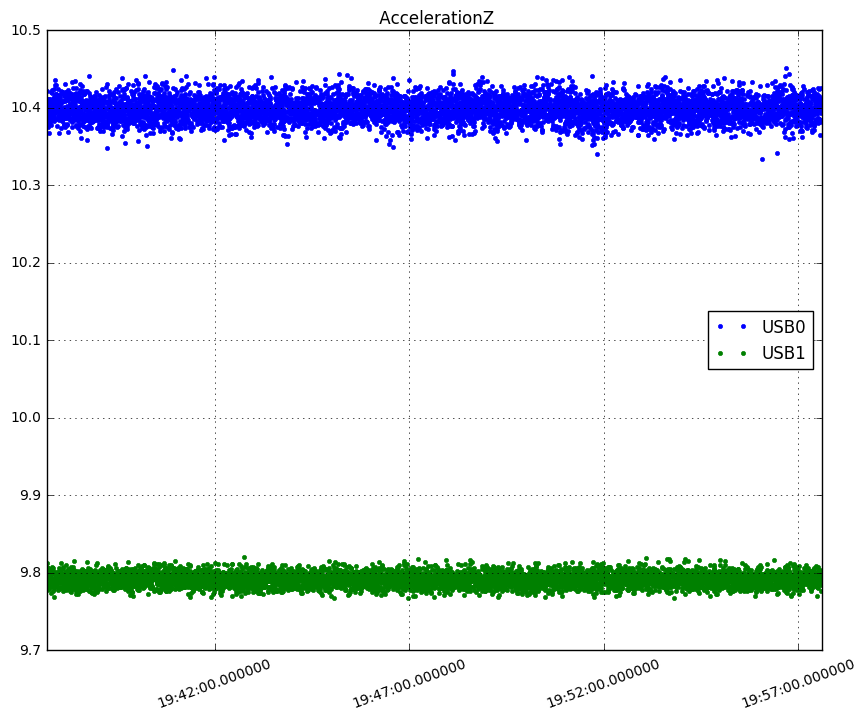

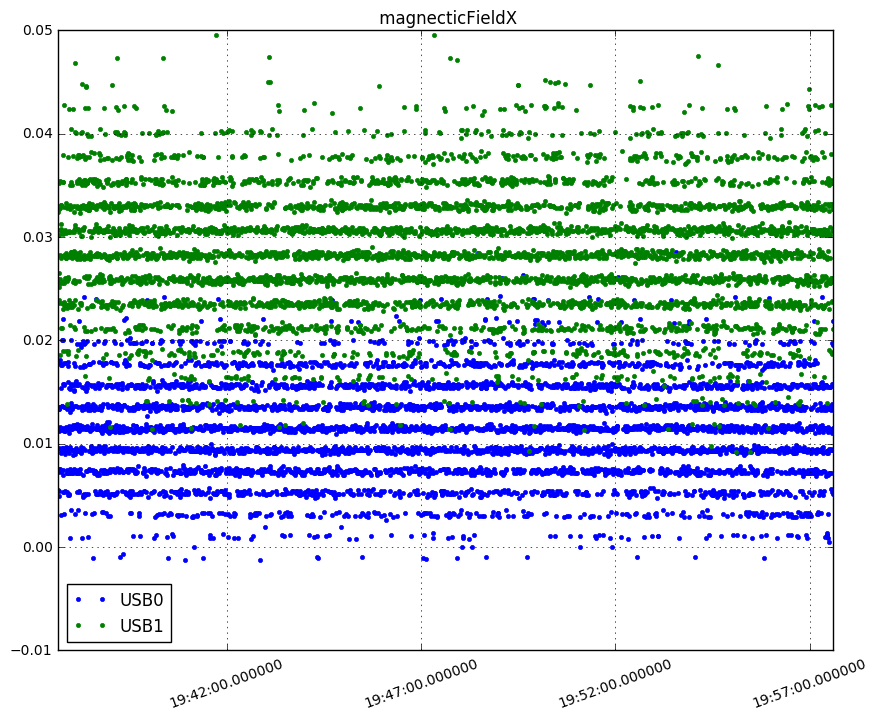

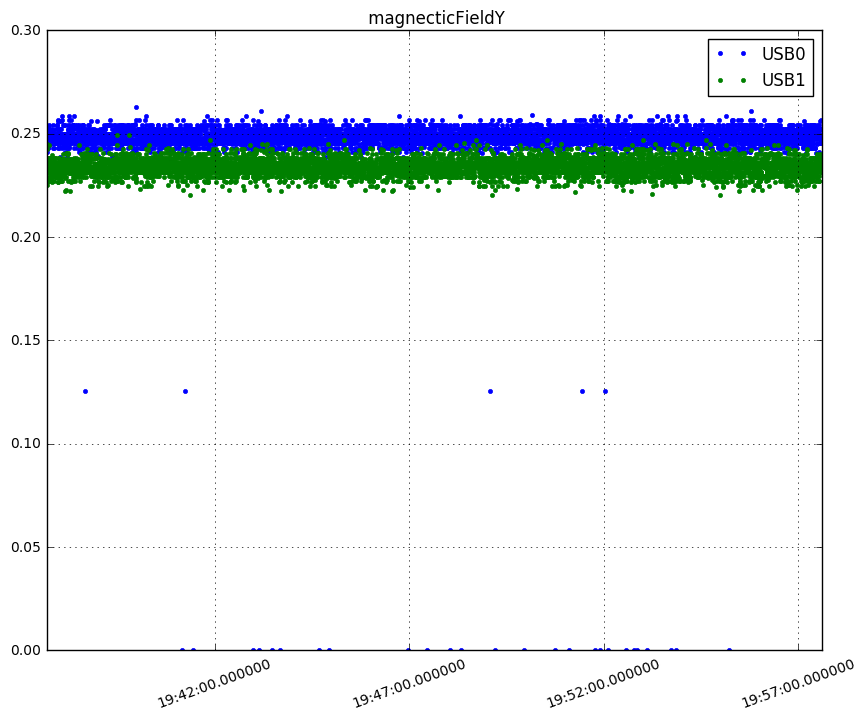

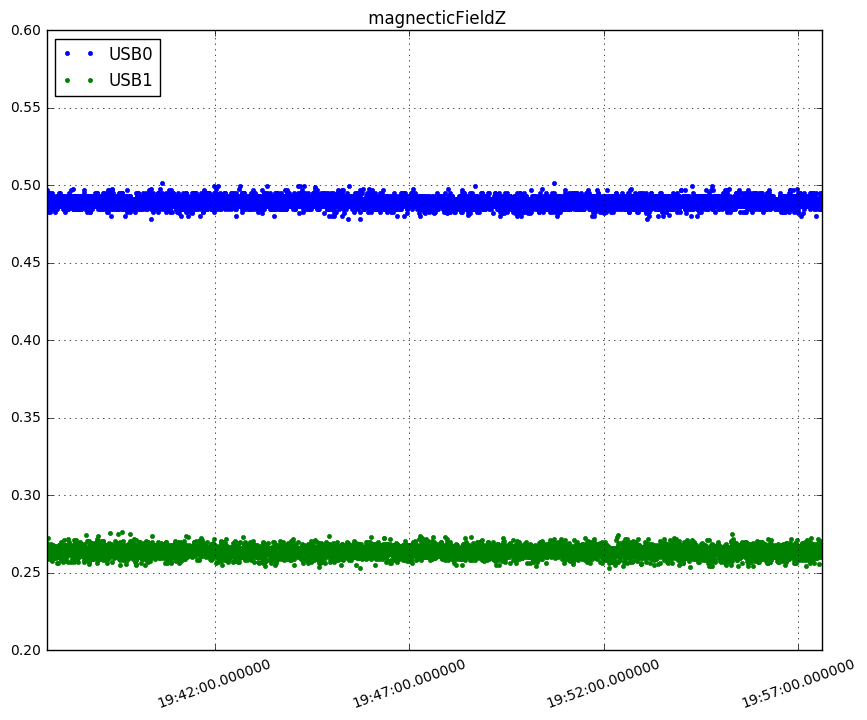

In [213]:
for col in dd0.columns:
    print col
    
    pl.figure(figsize=(10,8))
    pl.plot(dd0.index, dd0[col], '.', label='USB0')
    pl.plot(dd1.index, dd1[col], '.', label='USB1')
    pl.grid()
    pl.legend(loc=0)
    pl.title(col)
    pl.xticks(rotation=20)
    
    if col == ' magnecticFieldZ':
        pl.ylim(0.2,0.6)

# pl.plot(dd0[col])
pl.show()

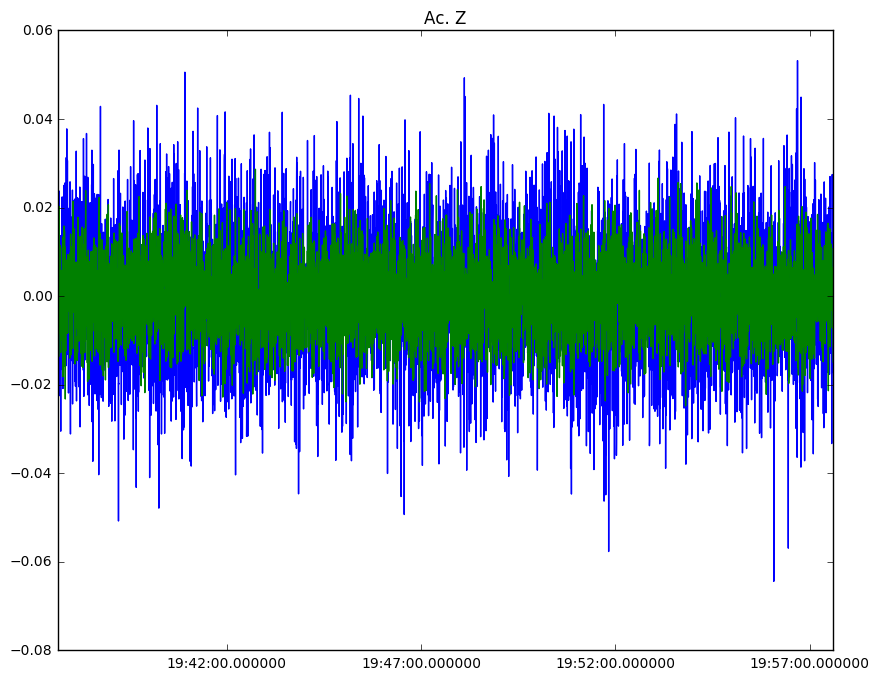

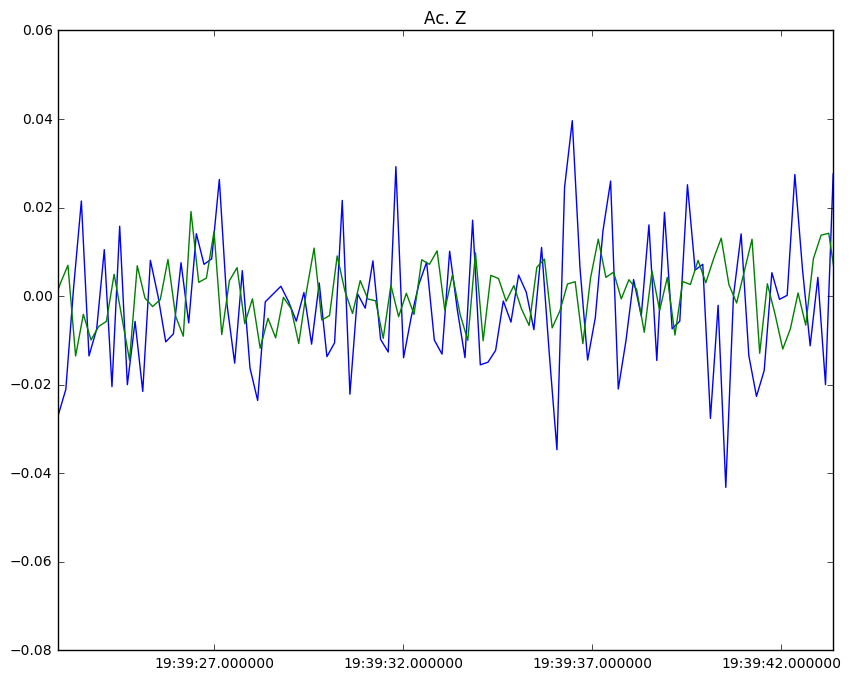

In [210]:
pl.figure(figsize=(10,8))
pl.plot(dd0.index, dd0[' AccelerationZ'] - dd0[' AccelerationZ'].mean())
pl.plot(dd1.index, dd1[' AccelerationZ'] - dd1[' AccelerationZ'].mean())
pl.title('Ac. Z')

pl.figure(figsize=(10,8))
pl.plot(dd0.index, dd0[' AccelerationZ'] - dd0[' AccelerationZ'].mean())
pl.plot(dd1.index, dd1[' AccelerationZ'] - dd1[' AccelerationZ'].mean())
pl.xlim(dd0.index[500], dd0.index[600])
pl.title('Ac. Z')


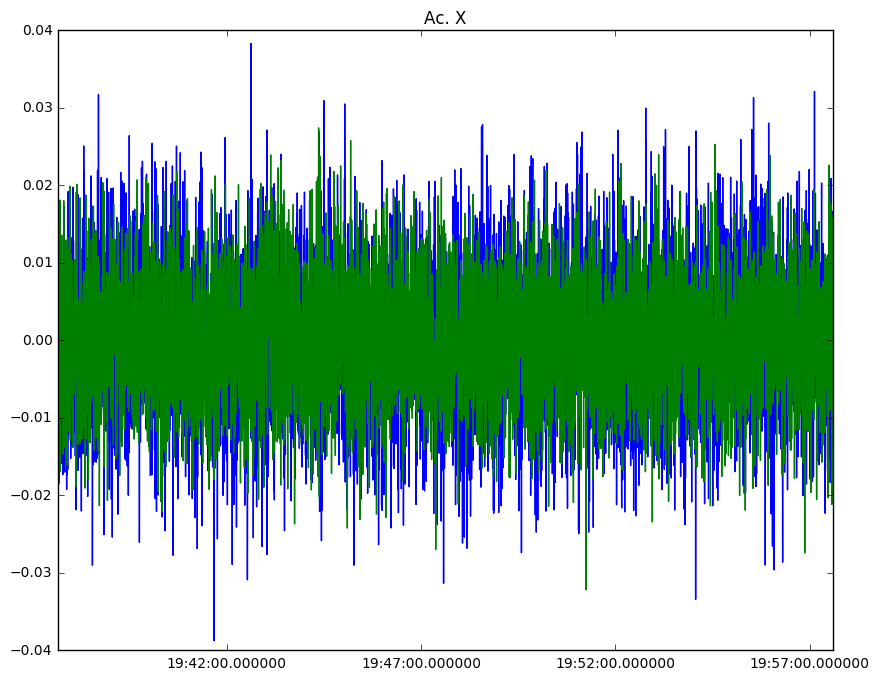

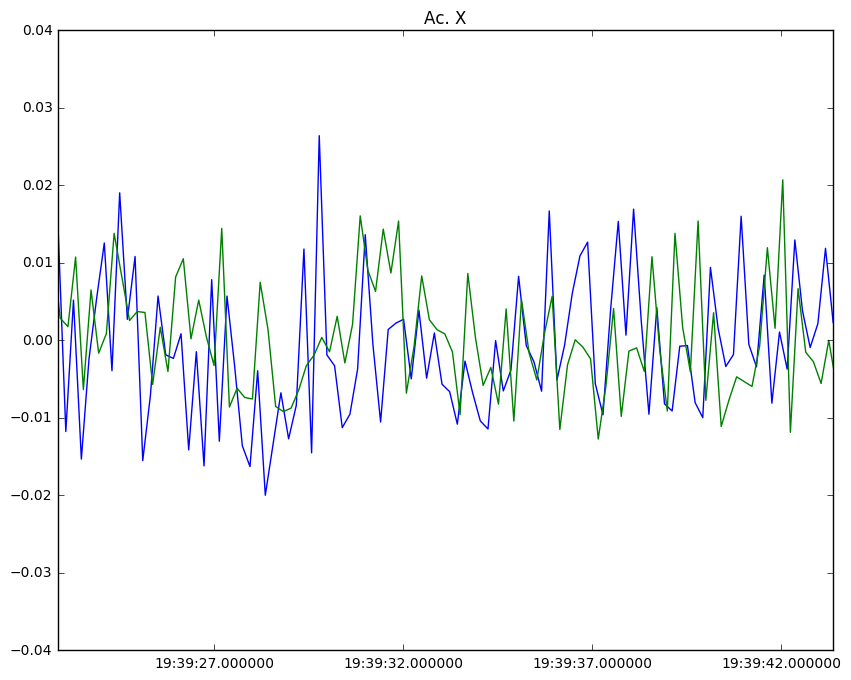

In [211]:
pl.figure(figsize=(10,8))
pl.plot(dd0.index, dd0[' AccelerationX'] - dd0[' AccelerationX'].mean())
pl.plot(dd1.index, dd1[' AccelerationX'] - dd1[' AccelerationX'].mean())
pl.title('Ac. X')

pl.figure(figsize=(10,8))
pl.plot(dd0.index, dd0[' AccelerationX'] - dd0[' AccelerationX'].mean())
pl.plot(dd1.index, dd1[' AccelerationX'] - dd1[' AccelerationX'].mean())
pl.xlim(dd0.index[500], dd0.index[600])
pl.title('Ac. X')

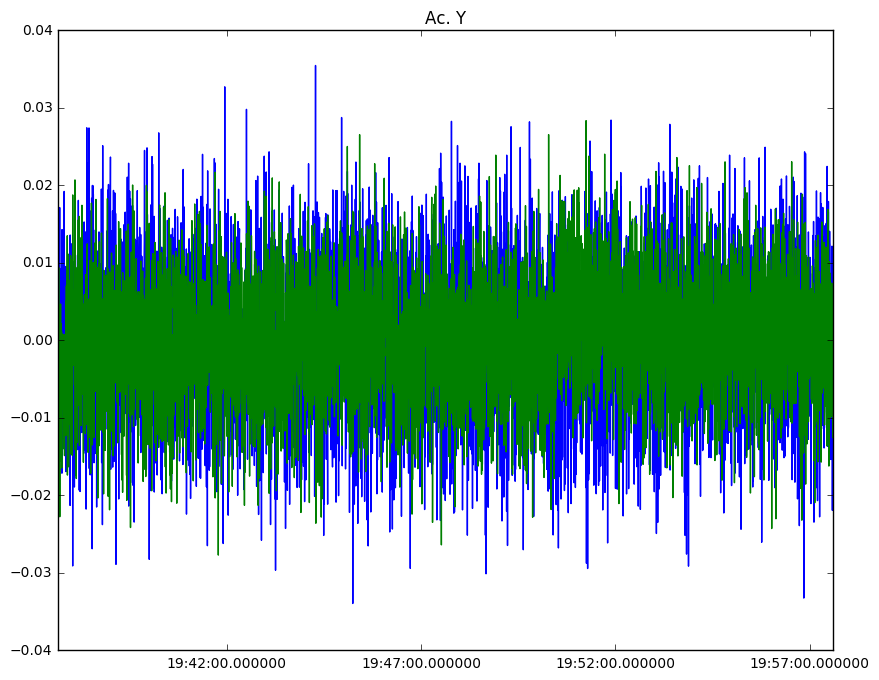

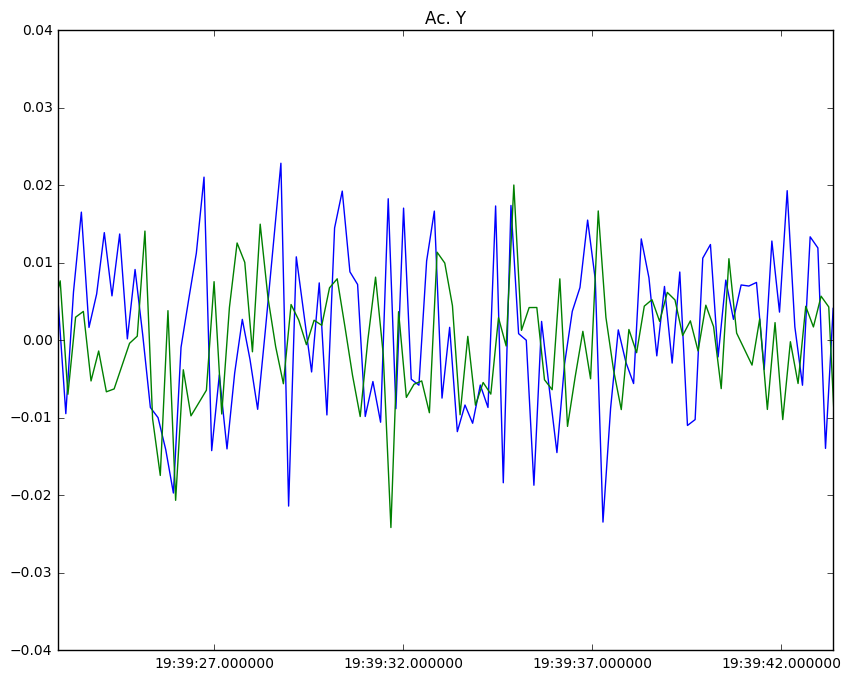

In [212]:
pl.figure(figsize=(10,8))
pl.plot(dd0.index, dd0[' AccelerationY'] - dd0[' AccelerationY'].mean())
pl.plot(dd1.index, dd1[' AccelerationY'] - dd1[' AccelerationY'].mean())
pl.title('Ac. Y')

pl.figure(figsize=(10,8))
pl.plot(dd0.index, dd0[' AccelerationY'] - dd0[' AccelerationY'].mean())
pl.plot(dd1.index, dd1[' AccelerationY'] - dd1[' AccelerationY'].mean())
pl.xlim(dd0.index[500], dd0.index[600])
pl.title('Ac. Y')

(0, 0.2)

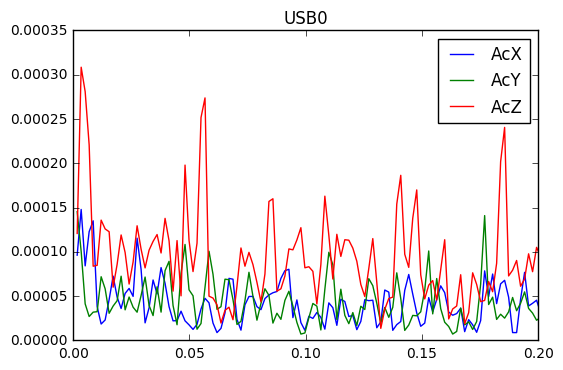

In [227]:
# calculo do espectro - USB0

aax0 = espec.espec1(dd0[' AccelerationX'], nfft=len(dd0)/2, fs=5)
aay0 = espec.espec1(dd0[' AccelerationY'], nfft=len(dd0)/2, fs=5)
aaz0 = espec.espec1(dd0[' AccelerationZ'], nfft=len(dd0)/2, fs=5)

pl.plot(aax0[:,0], aax0[:,1], label='AcX')
pl.plot(aay0[:,0], aay0[:,1], label='AcY')
pl.plot(aaz0[:,0], aaz0[:,1], label='AcZ')
pl.title('USB0')
pl.legend()
pl.xlim(0,0.2)

(0, 0.2)

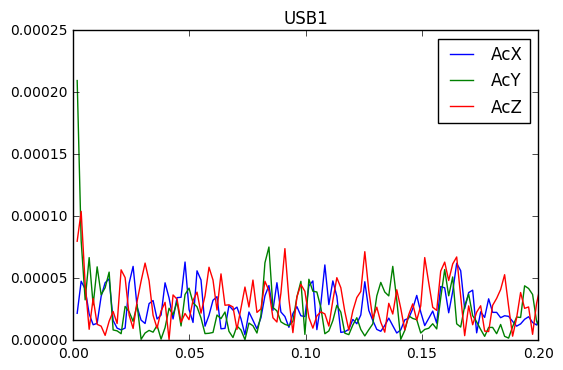

In [229]:
# calculo do espectro - USB1

aax1 = espec.espec1(dd1[' AccelerationX'], nfft=len(dd0)/2, fs=5)
aay1 = espec.espec1(dd1[' AccelerationY'], nfft=len(dd0)/2, fs=5)
aaz1 = espec.espec1(dd1[' AccelerationZ'], nfft=len(dd0)/2, fs=5)

pl.plot(aax1[:,0], aax1[:,1], label='AcX')
pl.plot(aay1[:,0], aay1[:,1], label='AcY')
pl.plot(aaz1[:,0], aaz1[:,1], label='AcZ')
pl.title('USB1')
pl.legend()
pl.xlim(0,0.2)

(0, 0.2)

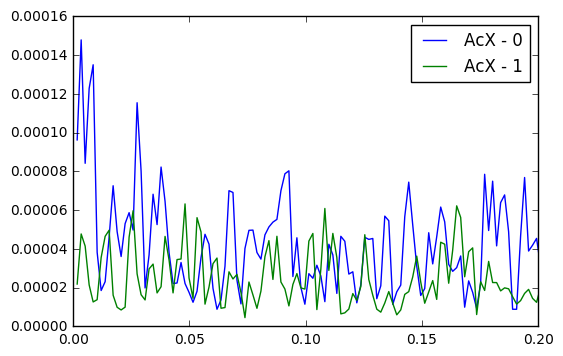

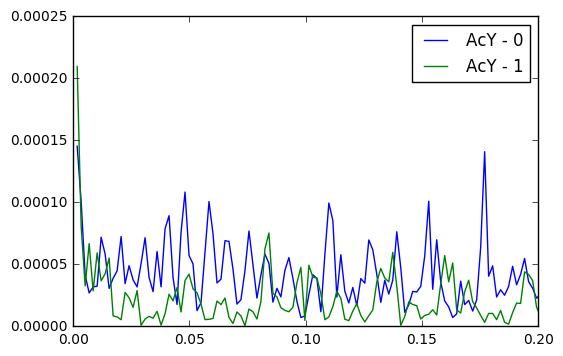

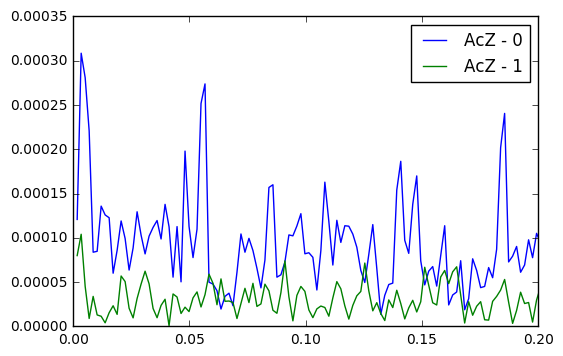

In [233]:
#comparacao espectro ac - usb1 e 2

pl.figure()
pl.plot(aax0[:,0], aax0[:,1], label='AcX - 0')
pl.plot(aax1[:,0], aax1[:,1], label='AcX - 1')
pl.legend()
pl.xlim(0,0.2)

pl.figure()
pl.plot(aay0[:,0], aay0[:,1], label='AcY - 0')
pl.plot(aay1[:,0], aay1[:,1], label='AcY - 1')
pl.legend()
pl.xlim(0,0.2)

pl.figure()
pl.plot(aaz0[:,0], aaz0[:,1], label='AcZ - 0')
pl.plot(aaz1[:,0], aaz1[:,1], label='AcZ - 1')
pl.legend()
pl.xlim(0,0.2)